In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

In [2]:
X_train_res = pd.read_csv('X_train_res_regression.csv')
y_train_res = pd.read_csv('y_train_res_regression.csv')
X_test_res = pd.read_csv('X_test_res_regression.csv')
y_test_res = pd.read_csv('y_test_res_regression.csv')

xgb_regressor = XGBRegressor(random_state=42)
xgb_regressor.fit(X_train_res, y_train_res)

y_pred = xgb_regressor.predict(X_test_res)

mse = mean_squared_error(y_test_res, y_pred)
r2 = r2_score(y_test_res, y_pred)
mae = mean_absolute_error(y_test_res, y_pred)

print("XGBoost Regressor Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

XGBoost Regressor Performance:
Mean Squared Error: 173.0333
R2 Score: 0.9506
Mean Absolute Error: 7.3299


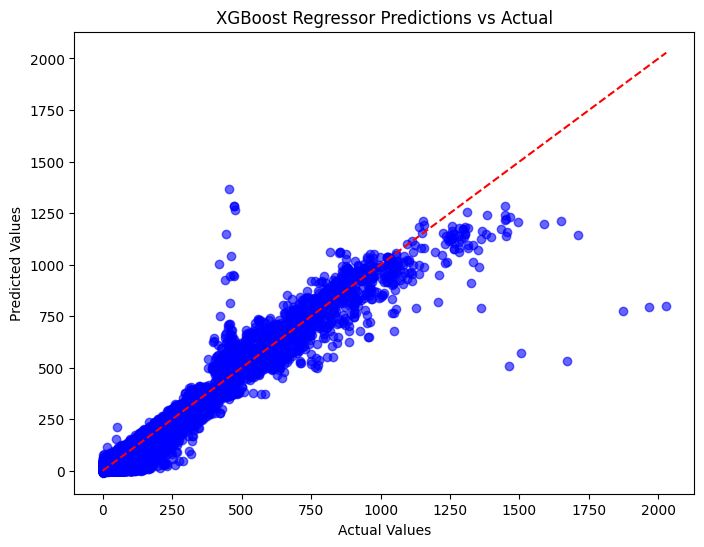

In [3]:
def visualize_results(y_test, y_pred, model_name):
    y_test = np.ravel(y_test)
    y_pred = np.ravel(y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f'{model_name} Predictions vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

visualize_results(y_test_res, y_pred, 'XGBoost Regressor')